In [1]:
import pandas as pd

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eq5d=pd.read_csv('rq1_cleaned_no_ae.csv')


scores=pd.read_excel('../data/Scores 6 Jan 2025_Prescribed_Completed Baseline PROMs.xlsx')
gad7=scores[scores['promName']=='GAD7']
gad7=gad7[['SID','Round','promName','total_score','completionDate']]


gad7_wide = gad7.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

gad7_wide.columns = [f"GAD7_Round{r}" for r in gad7_wide.columns]
gad7_wide = gad7_wide.reset_index()
gad7= pd.merge(eq5d, gad7_wide, on='SID', how='left')
gad7=gad7.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

insomnia=scores[scores['promName']=='insomniaEfficacyMeasure']
insomnia=insomnia[['SID','Round','promName','total_score','completionDate']]


insomnia_wide = insomnia.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

insomnia_wide.columns = [f"insomniaEfficacyMeasure_Round{r}" for r in insomnia_wide.columns]
insomnia_wide = insomnia_wide.reset_index()
insomnia_wide= pd.merge(gad7, insomnia_wide, on='SID', how='left')
insomnia=insomnia_wide.rename(columns={'insomniaEfficacyMeasure_Round1_y': 'insomniaEfficacyMeasure_Round1',})
full=insomnia.copy()


In [3]:
full.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round1_x',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neurop

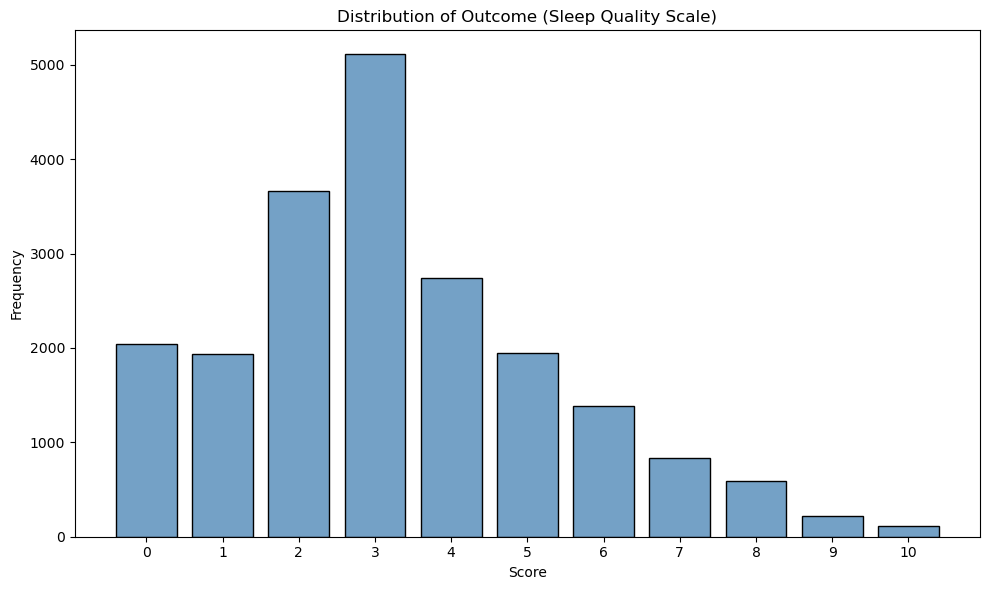

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))

# Draw bars for each integer score
sns.histplot(
    full['insomniaEfficacyMeasure_Round1'],
    bins=np.arange(-0.5, 10.5, 1),  # edges at -0.5, 0.5, 1.5, …, 20.5, 21.5
    stat='count',
    discrete=True,
    shrink=0.8,                     
    color='steelblue',
    edgecolor='black'
)


plt.title('Distribution of Outcome (Sleep Quality Scale)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(0,11))           
plt.tight_layout()
plt.show()


Linear Regression

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred  = lr.predict(X_test_scaled)

train_r2  = r2_score(y_train, y_train_pred)
test_r2   = r2_score(y_test,  y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test,  y_test_pred)

print(f"Train R²:  {train_r2:.4f}")
print(f"Test  R²:  {test_r2:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test  MSE: {test_mse:.4f}")

Train R²:  0.1561
Test  R²:  -518870109457840406528.0000
Train MSE: 5.2796
Test  MSE: 3191174971471297511424.0000


Correlation between Predictors and Outcome

In [6]:
predictors = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
sqs_cor= predictors.corr()['insomniaEfficacyMeasure_Round2'].drop('insomniaEfficacyMeasure_Round2')
print(sqs_cor.sort_values(ascending=False))

insomniaEfficacyMeasure_Round1    0.362776
EQ5D_Round1                       0.216673
occupation                        0.138805
height                            0.035773
alcohol_units                     0.030450
                                    ...   
Depression_or_anxiety            -0.046418
Smoking_pack_years               -0.054713
diag_Fibromyalgia                -0.062125
Smoking_status                   -0.087880
GAD7_Round1                      -0.183122
Name: insomniaEfficacyMeasure_Round2, Length: 103, dtype: float64


In [7]:
sqs_cor= predictors.corr()['insomniaEfficacyMeasure_Round2'].drop('insomniaEfficacyMeasure_Round2')

# Turn into DataFrame, with absolute value for sorting
corr_df = sqs_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})

sqs_corr = corr_df
print(sqs_corr)


                          Predictor  Correlation  Abs_Correlation
0    insomniaEfficacyMeasure_Round1     0.362776         0.362776
1                       EQ5D_Round1     0.216673         0.216673
2                       GAD7_Round1    -0.183122         0.183122
3                        occupation     0.138805         0.138805
4                    Smoking_status    -0.087880         0.087880
..                              ...          ...              ...
98                 diag_Cancer pain     0.000443         0.000443
99                     Solid_tumour     0.000411         0.000411
100                         Allergy     0.000203         0.000203
101            diag_Eating disorder    -0.000189         0.000189
102     Peripheral_vascular_disease    -0.000051         0.000051

[103 rows x 3 columns]


In [8]:
import statsmodels.api as sm
sqs_top = sqs_corr['Predictor'].head(10)

univariate_sqs = []

for predictor in sqs_top:
    X = full[[predictor, 'insomniaEfficacyMeasure_Round2']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['insomniaEfficacyMeasure_Round2']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_sqs.append(result)


univariate_sqs_df = pd.DataFrame(univariate_sqs)
print(univariate_sqs_df)


                        Predictor  Beta Coefficient          p-val  R-squared
0  insomniaEfficacyMeasure_Round1          0.426419   0.000000e+00   0.131607
1                     EQ5D_Round1          1.776782  7.365771e-217   0.046947
2                     GAD7_Round1         -0.071925  1.983842e-154   0.033534
3                      occupation          0.641239   6.315935e-89   0.019267
4                  Smoking_status         -0.292320   1.613310e-36   0.007723
5               diag_Fibromyalgia         -0.561384   4.941405e-19   0.003859
6              Smoking_pack_years         -0.009656   4.212600e-15   0.002993
7           Depression_or_anxiety         -0.232042   2.790696e-11   0.002155
8                       diag_PTSD         -0.491128   2.157467e-07   0.001308
9                          height          0.008402   2.907880e-07   0.001280


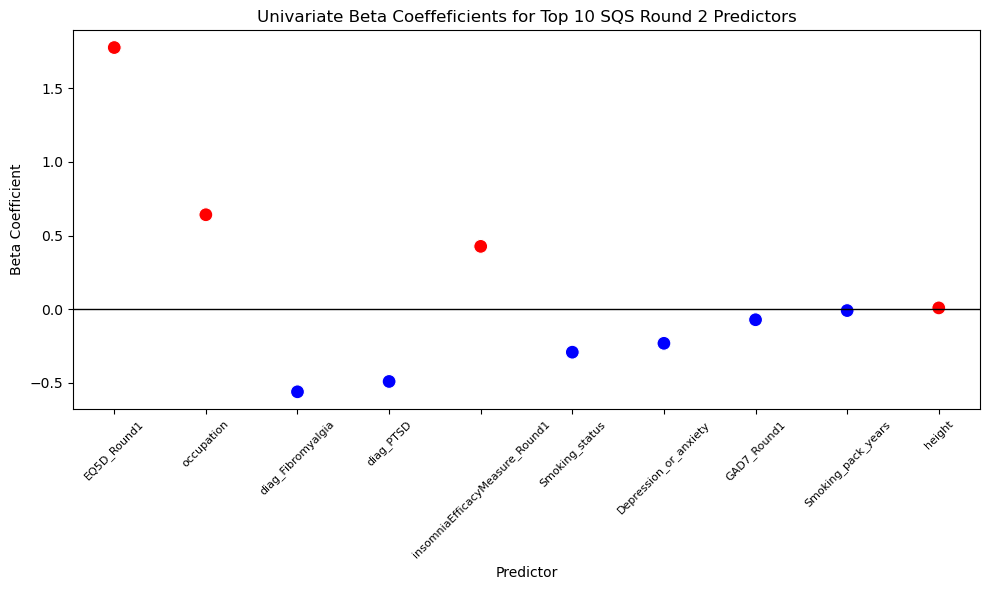

In [25]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_sqs_df['Abs_Beta'] = univariate_sqs_df['Beta Coefficient'].abs()
df_plot = univariate_sqs_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 SQS Round 2 Predictors')
plt.xlabel('Predictor')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Beta Coefficient')
plt.tight_layout()
plt.show()

Assumption Checking

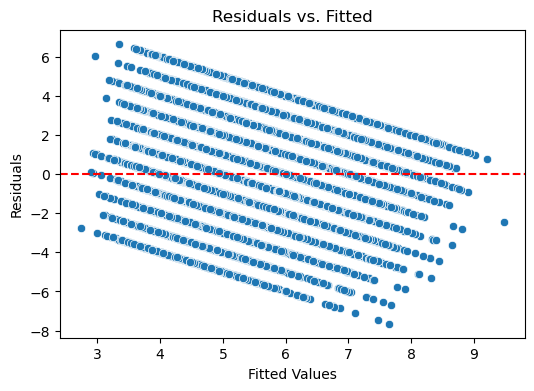

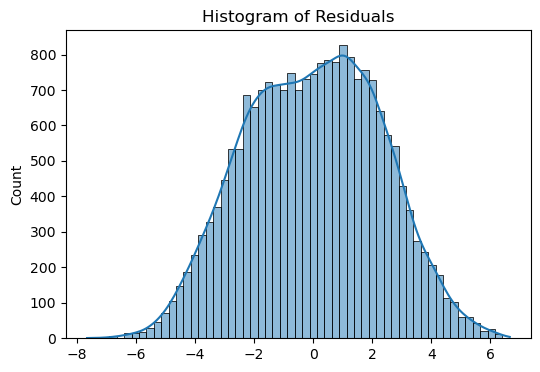

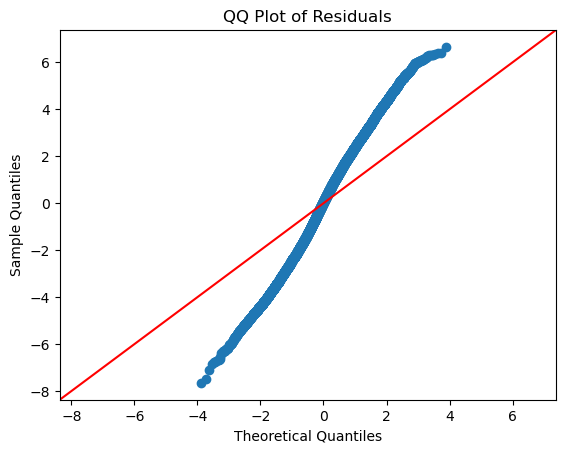

Predictions below min EQ5D: 0
Predictions above max EQ5D: 0


In [28]:
X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
X=X.dropna()
X=sm.add_constant(X)
y=full['insomniaEfficacyMeasure_Round2']

data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns='insomniaEfficacyMeasure_Round2')
X = sm.add_constant(X)
y = data['insomniaEfficacyMeasure_Round2']

model =sm.OLS(y,X).fit()

y_pred = model.predict(X)
residuals = y - y_pred

# 1) Residuals vs. Fitted plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# 2) Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 3) QQ plot for normality
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# 4) Check predictions out of bounds
print("Predictions below min EQ5D:", (y_pred < 0).sum())
print("Predictions above max EQ5D:", (y_pred > 10).sum())


Removing variables with high multicollinearity

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = full.drop(columns=['SID', 'GAD7_Round3', 'GAD7_Round2','EQ5D_Round2',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])

y = full['insomniaEfficacyMeasure_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']


corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)


X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)


ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})


print(results)


high_corr_pairs = (
    upper
    .where(upper > threshold)
    .stack()                        
    .reset_index()                  
)
high_corr_pairs.columns = ['Var_1', 'Var_2', 'Correlation']

print(high_corr_pairs)


Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared       MSE
0  Random Forest  Train   0.877817  0.764439
1  Random Forest   Test   0.137503  5.304565
2            OLS  Train   0.156013  5.280411
3            OLS   Test   0.157848  5.179438
                 Var_1              Var_2  Correlation
0     Total_THC (mg/g)   Total_CBD (mg/g)     0.837770
1   alpha-Pinene (PPM)     Camphene (PPM)     0.805620
2   alpha-Pinene (PPM)  beta-Pinene (PPM)     0.914209
3       Camphene (PPM)  beta-Pinene (PPM)     0.801002
4  Caryophyllene (PPM)     Humulene (PPM)     0.923225


Penalised Regression

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared       MSE       Alpha
0  Ridge  Train   0.155648  5.282696  754.312006
1  Ridge   Test   0.158933  5.172765  754.312006
2  Lasso  Train   0.152545  5.302110    0.016768
3  Lasso   Test   0.160235  5.164754    0.016768


In [32]:
feature_names = X_train.columns

ridge_coefs = pd.Series(ridge.coef_, index=feature_names)
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)


ridge_top = ridge_coefs.reindex(ridge_coefs.abs().sort_values(ascending=False).index)
lasso_top = lasso_coefs.reindex(lasso_coefs.abs().sort_values(ascending=False).index)


N = 10
print("Top 10 Ridge predictors:")
print(ridge_top.head(N))

print("\nTop 10 Lasso predictors:")
print(lasso_top.head(N))

Top 10 Ridge predictors:
insomniaEfficacyMeasure_Round1    0.751107
occupation                        0.156699
GAD7_Round1                      -0.149932
EQ5D_Round1                       0.124640
Smoking_status                   -0.091662
Linalool (PPM)                    0.082792
Geraniol (PPM)                   -0.070512
Cannabis_status                  -0.068889
diag_Fibromyalgia                -0.063293
diag_Chronic pain                -0.060538
dtype: float64

Top 10 Lasso predictors:
insomniaEfficacyMeasure_Round1    0.778537
occupation                        0.144794
EQ5D_Round1                       0.137184
GAD7_Round1                      -0.110858
Smoking_status                   -0.081066
Age                              -0.059768
Geraniol (PPM)                   -0.045709
Cannabis_status                  -0.038150
Caryophyllene (PPM)              -0.034222
D-Limonene (PPM)                 -0.033611
dtype: float64


Ordinal Regression

In [33]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']

model = OrderedModel(
    endog=y,
    exog=X,
    distr='logit'  # 'logit' = ordinal logistic, 'probit' = ordinal probit
)

result = model.fit(method='bfgs')

print(result.summary())

pred_probs = result.predict(X)
print(pred_probs.head())

Optimization terminated successfully.
         Current function value: 2.189098
         Iterations: 389
         Function evaluations: 399
         Gradient evaluations: 399
                                   OrderedModel Results                                   
Dep. Variable:     insomniaEfficacyMeasure_Round2   Log-Likelihood:                -44960.
Model:                               OrderedModel   AIC:                         9.015e+04
Method:                        Maximum Likelihood   BIC:                         9.104e+04
Date:                            Wed, 02 Jul 2025                                         
Time:                                    16:12:09                                         
No. Observations:                           20538                                         
Df Residuals:                               20425                                         
Df Model:                                     103                                         
      

In [34]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit on training data
model = OrderedModel(
    endog=y_train,
    exog=X_train,
    distr='logit'
)
result = model.fit(method='bfgs')

# Predict on test data
pred_probs_test = result.predict(X_test)
pred_class_test = pred_probs_test.idxmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred_class_test)
print(f"Test set accuracy: {acc:.3f}")



Optimization terminated successfully.
         Current function value: 2.190989
         Iterations: 333
         Function evaluations: 343
         Gradient evaluations: 343
Test set accuracy: 0.176


c:\Users\abbyh\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [35]:
# Mean absolute error
mae = np.mean(np.abs(y_test - pred_class_test))
print(f"Test MAE: {mae:.2f}")

# Accuracy within ±1
acc_within1 = np.mean(np.abs(y_test - pred_class_test) <= 1)
print(f"Accuracy within ±1: {acc_within1:.2f}")

# Accuracy within ±2
acc_within2 = np.mean(np.abs(y_test - pred_class_test) <= 2)
print(f"Accuracy within ±2: {acc_within2:.2f}")

Test MAE: 2.10
Accuracy within ±1: 0.44
Accuracy within ±2: 0.64


Neural Network

In [38]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42,
                         early_stopping=True,       
                         validation_fraction=0.1,   
                         n_iter_no_change=10))      
])


param_grid = {
    'mlp__hidden_layer_sizes':[
    (100,50), (100,50,25),
    (200,100,50),
    (200,100,50,25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4, 1e-3],    
    'mlp__learning_rate_init': [1e-3, 1e-2]
}


gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Train R²:", gs.score(X_train, y_train))
print("Test  R²:", gs.score(X_test, y_test))

y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Best params: {'mlp__activation': 'tanh', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (200, 100, 50, 25), 'mlp__learning_rate_init': 0.01}
Train R²: 0.1640525813795385
Test  R²: 0.14115201606525374
Train MSE: 5.230113005345692
Test  MSE:  5.282120015537024


In [39]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


def sample_hidden_layer_sizes(n_iter, min_layers=1, max_layers=8, min_units=50, max_units=300, random_state=None):

    rng = np.random.default_rng(random_state)
    sizes = set()
    while len(sizes) < n_iter:
        # Sample number of layers
        n_layers = rng.integers(min_layers, max_layers + 1)
        # Sample units for each layer
        units = tuple(rng.integers(min_units, max_units + 1, size=n_layers).tolist())
        sizes.add(units)
    return list(sizes)


hidden_layer_candidates = sample_hidden_layer_sizes(n_iter=50, random_state=42)


param_dist = {
    'mlp__hidden_layer_sizes': hidden_layer_candidates,
    'mlp__alpha': loguniform(1e-5, 1e-2),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
    'mlp__activation': ['relu', 'tanh']
}

# 3. Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])


rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Train R²:", rs.score(X_train, y_train))
print("Test  R²:", rs.score(X_test, y_test))



Best params: {'mlp__activation': 'tanh', 'mlp__alpha': 0.00042470585622618684, 'mlp__hidden_layer_sizes': (209, 191, 188, 72, 190), 'mlp__learning_rate_init': 0.000774141798524289}
Train R²: 0.1787428382619476
Test  R²: 0.13843775707109063


In [40]:
y_train_pred = rs.predict(X_train)
y_test_pred  = rs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Train MSE: 5.138203272913776
Test  MSE:  5.298813355951862


Round 3 Prediction

Correlation between Predictors and SQS Round 3

In [10]:
predictors = full.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
sqs_cor= predictors.corr()['insomniaEfficacyMeasure_Round3'].drop('insomniaEfficacyMeasure_Round3')
print(sqs_cor.sort_values(ascending=False))

insomniaEfficacyMeasure_Round2    0.562964
insomniaEfficacyMeasure_Round1    0.337785
EQ5D_Round2                       0.321158
EQ5D_Round1                       0.221316
occupation                        0.149873
                                    ...   
Smoking_pack_years               -0.067978
diag_Fibromyalgia                -0.074337
Smoking_status                   -0.112392
GAD7_Round1                      -0.162409
GAD7_Round2                      -0.336954
Name: insomniaEfficacyMeasure_Round3, Length: 106, dtype: float64


In [13]:
sqs_corr=predictors.corr()['insomniaEfficacyMeasure_Round3'].drop('insomniaEfficacyMeasure_Round3')
corr_df = sqs_corr.to_frame(name='Correlation')
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)
corr_df = corr_df.reset_index().rename(columns={'index':'Predictor'})

sqs_corr = corr_df
print(sqs_corr)

                          Predictor  Correlation  Abs_Correlation
0    insomniaEfficacyMeasure_Round2     0.562964         0.562964
1    insomniaEfficacyMeasure_Round1     0.337785         0.337785
2                       GAD7_Round2    -0.336954         0.336954
3                       EQ5D_Round2     0.321158         0.321158
4                       EQ5D_Round1     0.221316         0.221316
..                              ...          ...              ...
101                     diag_Crohns    -0.001419         0.001419
102                       form_Vape    -0.001371         0.001371
103                   form_Capsules    -0.001177         0.001177
104                  Camphene (PPM)     0.000522         0.000522
105        Congestive_heart_failure     0.000476         0.000476

[106 rows x 3 columns]


In [16]:
import statsmodels.api as sm
sqs_top = sqs_corr['Predictor'].head(10)

univariate_sqs = []

for predictor in sqs_top:
    X = full[[predictor, 'insomniaEfficacyMeasure_Round3']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['insomniaEfficacyMeasure_Round3']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_sqs.append(result)


univariate_sqs_df = pd.DataFrame(univariate_sqs)
print(univariate_sqs_df)


                        Predictor  Beta Coefficient          p-val  R-squared
0  insomniaEfficacyMeasure_Round2          0.568139   0.000000e+00   0.316929
1  insomniaEfficacyMeasure_Round1          0.398404   0.000000e+00   0.114098
2                     GAD7_Round2         -0.159037   0.000000e+00   0.113538
3                     EQ5D_Round2          2.979838   0.000000e+00   0.103142
4                     EQ5D_Round1          1.823020  6.343664e-180   0.048981
5                     GAD7_Round1         -0.063688   1.070003e-96   0.026377
6                      occupation          0.705846   1.813204e-82   0.022462
7                  Smoking_status         -0.375598   5.958920e-47   0.012632
8               diag_Fibromyalgia         -0.656458   2.082350e-21   0.005526
9              Smoking_pack_years         -0.011746   3.750681e-18   0.004621


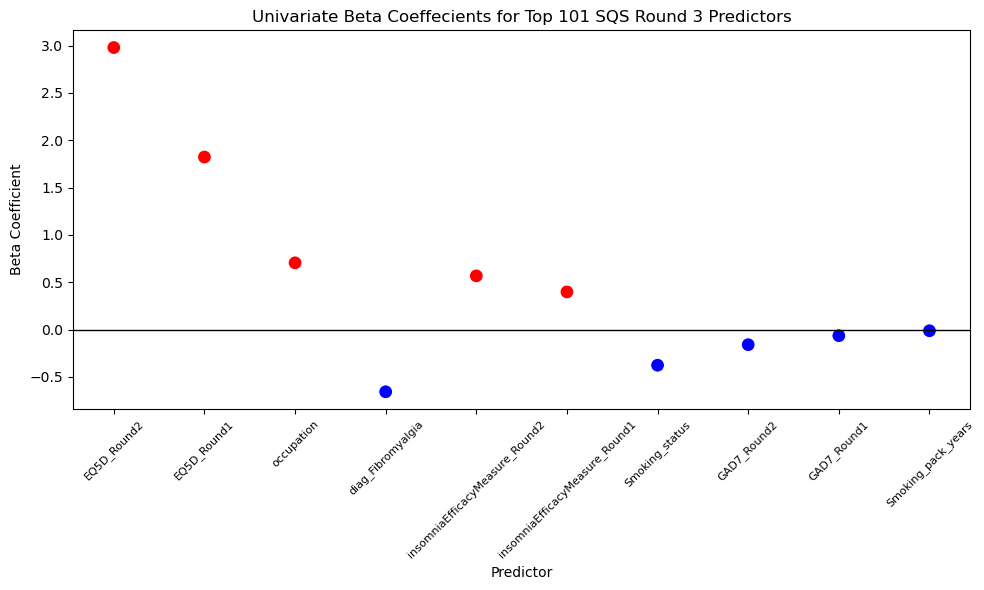

In [21]:
## Plot

univariate_sqs_df['Abs_Beta']=univariate_sqs_df['Beta Coefficient'].abs()
df_plot=univariate_sqs_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col']=df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette={'Positive': 'red','Negative': 'blue'}
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffecients for Top 101 SQS Round 3 Predictors')
plt.xlabel('Predictor')
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('Beta Coefficient')
plt.tight_layout()
plt.show()

Removing Variables with High Correlation

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = full.drop(columns=['SID', 'GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])

y = full['insomniaEfficacyMeasure_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round3')
y = data['insomniaEfficacyMeasure_Round3']


corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)


X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)


ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})


print(results)


high_corr_pairs = (
    upper
    .where(upper > threshold)
    .stack()                        
    .reset_index()                  
)
high_corr_pairs.columns = ['Var_1', 'Var_2', 'Correlation']

print(high_corr_pairs)


Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'gamma-Terpinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared       MSE
0  Random Forest  Train   0.906255  0.583432
1  Random Forest   Test   0.318588  4.219919
2            OLS  Train   0.364765  3.953450
3            OLS   Test   0.347580  4.040369
                  Var_1                  Var_2  Correlation
0      Total_THC (mg/g)       Total_CBD (mg/g)     0.837459
1    alpha-Pinene (PPM)         Camphene (PPM)     0.824184
2    alpha-Pinene (PPM)      beta-Pinene (PPM)     0.916480
3        Camphene (PPM)      beta-Pinene (PPM)     0.817865
4  alfa-Terpinene (PPM)  gamma-Terpinene (PPM)     0.816739
5   Caryophyllene (PPM)         Humulene (PPM)     0.908404


Penalised Regression

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = full.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round3')
y = data['insomniaEfficacyMeasure_Round3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared       MSE       Alpha
0  Ridge  Train   0.364563  3.954707  429.193426
1  Ridge   Test   0.348333  4.035708  429.193426
2  Lasso  Train   0.359738  3.984740    0.022230
3  Lasso   Test   0.351889  4.013684    0.022230


In [24]:
feature_names = X_train.columns

ridge_coefs = pd.Series(ridge.coef_, index=feature_names)
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)


ridge_top = ridge_coefs.reindex(ridge_coefs.abs().sort_values(ascending=False).index)
lasso_top = lasso_coefs.reindex(lasso_coefs.abs().sort_values(ascending=False).index)


N = 10
print("Top 10 Ridge predictors:")
print(ridge_top.head(N))

print("\nTop 10 Lasso predictors:")
print(lasso_top.head(N))

Top 10 Ridge predictors:
insomniaEfficacyMeasure_Round2    1.074317
insomniaEfficacyMeasure_Round1    0.371263
GAD7_Round2                      -0.189958
EQ5D_Round2                       0.157380
Smoking_status                   -0.085036
Depression_or_anxiety            -0.072986
occupation                        0.068313
GAD7_Round1                       0.067982
diag_Chronic pain                -0.067592
diag_Fibromyalgia                -0.066801
dtype: float64

Top 10 Lasso predictors:
insomniaEfficacyMeasure_Round2    1.118067
insomniaEfficacyMeasure_Round1    0.346631
EQ5D_Round2                       0.175129
GAD7_Round2                      -0.133493
Smoking_status                   -0.075500
occupation                        0.052415
diag_Chronic pain                -0.047046
diag_Fibromyalgia                -0.038606
alcohol_units                     0.031577
Cannabis_status                  -0.028843
dtype: float64


Ordinal Regression

In [2]:
!pip install mord

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9898 sha256=22345b994bd8c472be7cc809f9244cdc1d47d01b844ea63dafec8d38ad81eddf
  Stored in directory: c:\users\abbyh\appdata\local\pip\cache\wheels\d1\fc\57\f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [29]:
from mord import LogisticIT
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [26]:
# fit ordinal logistic
X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticIT(alpha=10.0)  
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred))

mse  = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print("MSE: ", mse)
print("RMSE:", rmse)

MAE: 2.1545764362220057
MSE:  7.64143135345667
RMSE: 2.7643139028440076


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from mord import LogisticIT
import numpy as np

# single MSE scorer, negative because lower MSE is better
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid = GridSearchCV(
    LogisticIT(),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    scoring=mse_scorer,
    cv=5
)

grid.fit(X_train_scaled, y_train)

best_alpha = grid.best_params_['alpha']
cv_mse    = -grid.best_score_ 
cv_rmse   = np.sqrt(cv_mse)

print("Best α:",  best_alpha)
print("CV MSE:",  cv_mse)
print("CV RMSE:", cv_rmse)


Best α: 100
CV MSE: 7.813024954351796
CV RMSE: 2.795178876986551


In [53]:
## Prediction on test set


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


best_model = grid.best_estimator_


y_pred = best_model.predict(X_test_scaled)


test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE:  {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE:  {test_mae:.4f}")


Test MSE:  7.6385
Test RMSE: 2.7638
Test MAE:  2.1526


In [66]:
## Trying a smaller alpha for less regularization

model = LogisticIT(alpha=0.1)
model.fit(X_train_scaled, y_train)
print(model.theta_)

y_pred = model.predict(X_test_scaled)


test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE:  {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE:  {test_mae:.4f}")

[-0.68753324 -0.68753324 -0.68753324 -0.07107324 -0.05704136 -0.05704136
 -0.05704136  0.04283096  0.72518821  0.72518821]
Test MSE:  7.6470
Test RMSE: 2.7653
Test MAE:  2.1568


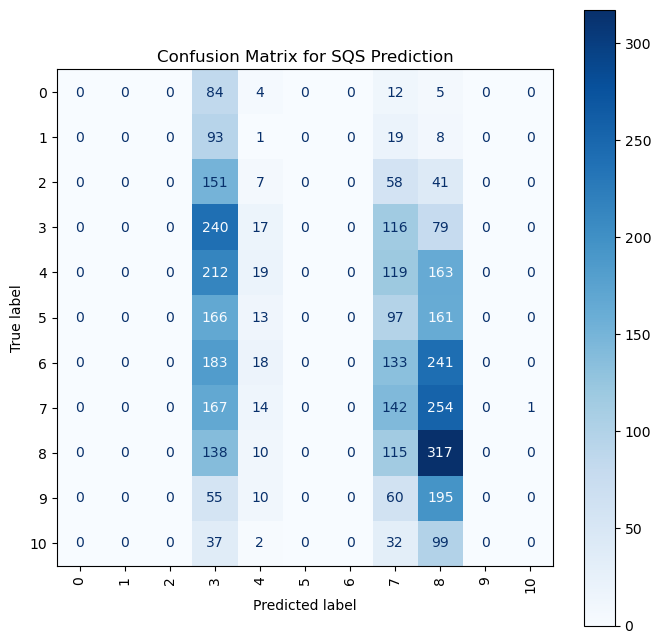

In [70]:
y_pred = best_model.predict(X_test_scaled)
labels = np.unique(np.concatenate((y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=labels)
labels = list(range(0,11))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix for SQS Prediction")
plt.show()

In [57]:
print(y_train.value_counts().sort_index())

insomniaEfficacyMeasure_Round2
0      418
1      528
2     1039
3     1931
4     1969
5     1882
6     2039
7     2340
8     2371
9     1191
10     722
Name: count, dtype: int64


In [65]:
zs = model.coef_.dot(X_test_scaled.T)  # shape=(n_samples,)
print(zs.min(), zs.max())


-0.4994779220815067 0.9950312565165743


In [ ]:
print("Cut-points (θ):", best_model.theta_)


Cut-points (θ): [-0.68753324 -0.68753324 -0.68753324 -0.07107324 -0.05704136 -0.05704136
 -0.05704136  0.04283096  0.72518821  0.72518821]


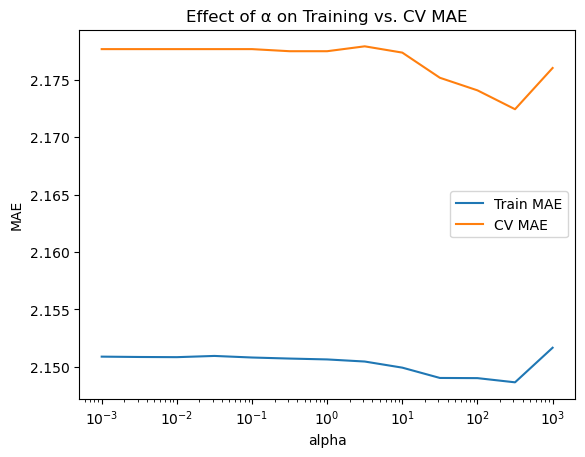

In [16]:
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from mord import LogisticIT
from sklearn.metrics import make_scorer, mean_absolute_error

# define MAE scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

alphas = np.logspace(-3, 3, 13)
train_mae, val_mae = [], []

for a in alphas:
    model = LogisticIT(alpha=a)
    # get both train and test cv scores on the *training set*
    res = cross_validate(
        model, X_train_scaled, y_train,
        cv=5,
        scoring=mae_scorer,
        return_train_score=True
    )
    # note: cross_validate gives *negative* scores for neg-mean-absolute-error
    train_mae.append(-res['train_score'].mean())
    val_mae.append(-res['test_score'].mean())

# plot the curves
plt.semilogx(alphas, train_mae, label='Train MAE')
plt.semilogx(alphas, val_mae,   label='CV MAE')
plt.xlabel('alpha'); plt.ylabel('MAE')
plt.legend()
plt.title('Effect of α on Training vs. CV MAE')
plt.show()


In [ ]:
## Ordinal Ridge
from mord import OrdinalRidge

X = full.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['insomniaEfficacyMeasure_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='insomniaEfficacyMeasure_Round2')
y = data['insomniaEfficacyMeasure_Round2']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
    OrdinalRidge(),
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=5
)
grid.fit(X_train_scaled, y_train)

print("Best α:", grid.best_params_['alpha'])
print("CV MAE:", -grid.best_score_)

# 4. Fit final model
best_alpha = grid.best_params_['alpha']
model = OrdinalRidge(alpha=best_alpha)
model.fit(X_train_scaled, y_train)

# 5. Predict & evaluate
y_pred = model.predict(X_test_scaled)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
acc  = accuracy_score(y_test, y_pred)

print(f"Test MAE:  {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MSE:  {mse:.3f}")
print(f"Accuracy:  {acc:.3f}")


    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred, labels=range(1,11))
    print("Confusion matrix:\n", cm)

Best α: 100
CV MAE: 1.8994522215459526
Test MAE:  1.870
Test RMSE: 2.291
Test MSE:  5.247
Accuracy:  0.145
Confusion matrix:
 [[  0   0   1  55  48  14   3   0   0   0]
 [  0   0   2  65 122  50  17   1   0   0]
 [  0   0   6  77 240 107  19   3   0   0]
 [  0   0   4  60 217 190  37   5   0   0]
 [  0   0   0  59 166 147  59   6   0   0]
 [  0   0   3  49 208 223  82   9   1   0]
 [  0   0   1  53 185 223  97  18   0   1]
 [  0   0   0  32 165 207 134  41   1   0]
 [  0   0   0   9  77 115  80  35   4   0]
 [  0   0   0  18  34  57  42  15   4   0]]


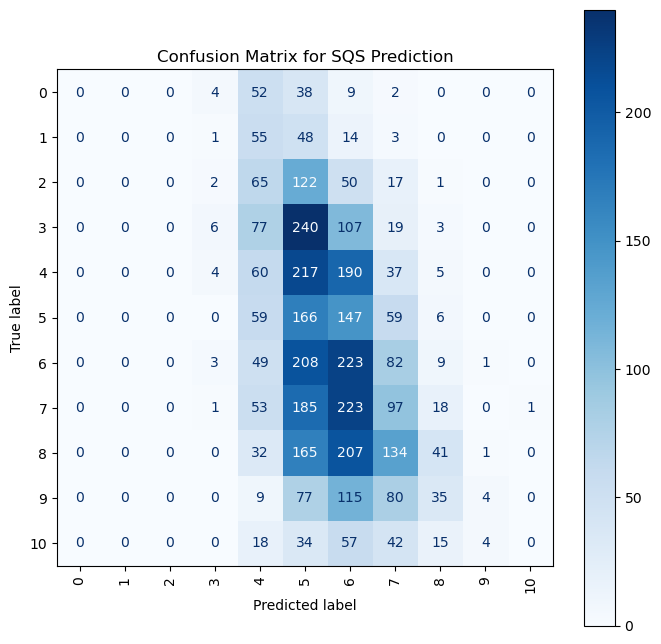

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
labels = list(range(0,11))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix for SQS Prediction")
plt.show()

In [41]:
# returns a Series indexed by the unique values, with counts as values
counts = y_test.value_counts().sort_index()
print(counts)


insomniaEfficacyMeasure_Round2
0     105
1     121
2     257
3     452
4     513
5     437
6     575
7     578
8     580
9     320
10    170
Name: count, dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'